In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

In [ ]:
nome = '../../malhasMSH/unidimensional_100T_dif_py.msh'
#nome = '../../malhasMSH/unidimensional_4e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
#noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura2D = 0.001)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 0.50)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente, debug=1)
invProblem.solve(sigma_inicial, V_measured)
#print('Y_jacobian',invProblem.Y_jacobian)

In [ ]:
invProblem.Y_Vcalc

## Testes com HUA

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
#nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'

#MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
MinhaMalha = mesh.HuaElectrodes2DMeshEdson(2, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 0.1,    
#1001 : 0.01,
5001 : 0.2, 
5002 : 0.2, 
#5003 : 0.2, 
#5004 : 0.2, 
#5005 : 0.2, 
#5006 : 0.2, 
#5007 : 0.2, 
#5008 : 0.2,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=0, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalha, Pcorrente=fwd.corrente)
invProblem_2D.solve(V_measured, initialEstimate=2.9,alpha =2.5,  Lambda = 0.50, max_iter=1,Tol=5.0e-4)
#print('Y_jacobian',invProblem.Y_jacobian)


# TESTE COM eletrodo pontual

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

# TESTE com eletrodo pontual mesh 4 elementos

## Regularização Filtro Gaussiano FP_Alta

fonte: Erick equação C.37

$$
\hat{\theta}_{k+1} = \hat{\theta}_k + \alpha_k
\left( J_k^T W_1 J_k + \lambda^2 L_2^T L_2 \right)^{-1}
\cdot \left( J_k^T W_1 (z - h(\hat{\theta}_k)) - \lambda^2 L_2^T L_2 (\hat{\theta}_k - \theta^*) \right)
$$
onde,
$$W_1=L_1^T L_1$$

Reading ../../malhasMSH/circ16_3_anomalia6_v2.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 ... 1003 1003 1003].
Physical tags found: [1000 1001 1002 1003].
Physical tags points: [10000 10001 10002 10003 10004 10005 10006 10007 10008 10009 10010 10011
 10012 10013 10014 10015 10016]
16 electrodes found.
MSH file with 2120 elements and 1109 nodes.
ElectrodeNodes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
GndNode: 16


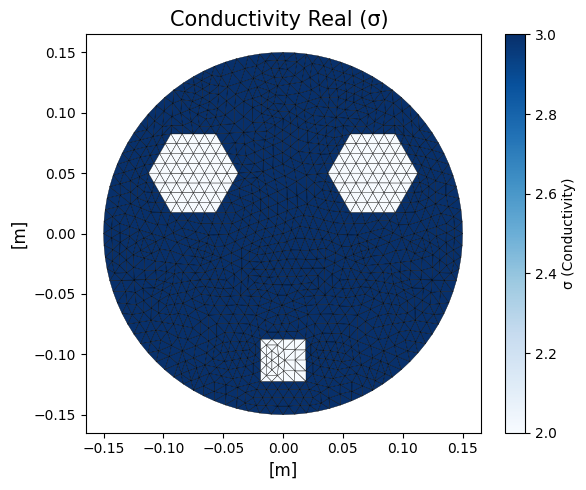

In [1]:
# %%time
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# TESTE COM eletrodo pontual mesh 4 elementos

###############################################################################
#nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'
nome = '../../malhasMSH/circ16_3_anomalia6_v2.msh'

#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 1.00)
MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto2.ReadMesh() 

#print(MinhaMalhaPto2.Elements[2])
#print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial



meus_sigmas = {
1000 : 3.0,
1001 : 2.00,
1002 : 2.00,    
1003 : 2.00}

MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=2, I =1.0e-3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
#print(f'Pcorrente \n {fwd.corrente[:16]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'ParaVernoGmshPto'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa \n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos


Reading ../../malhasMSH/circ16_base_plus.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 10

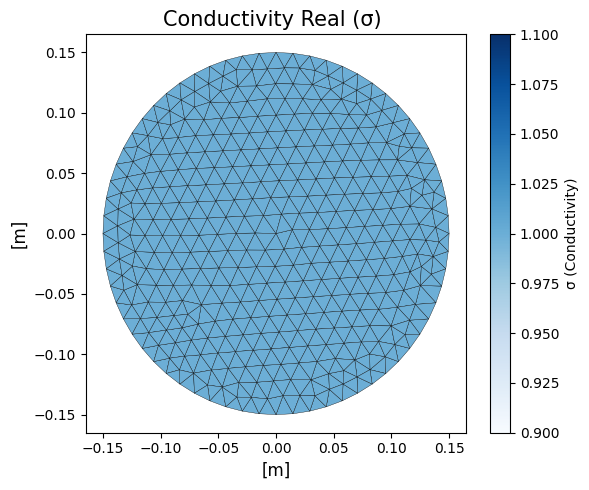

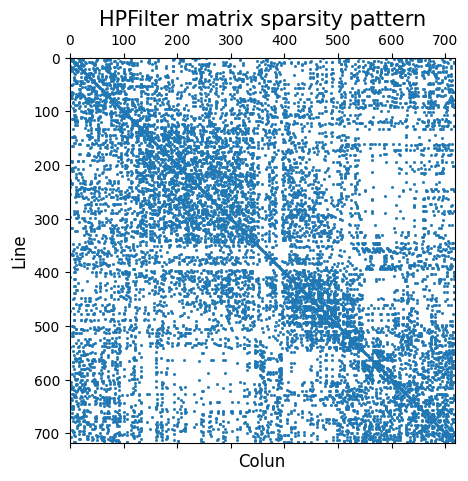

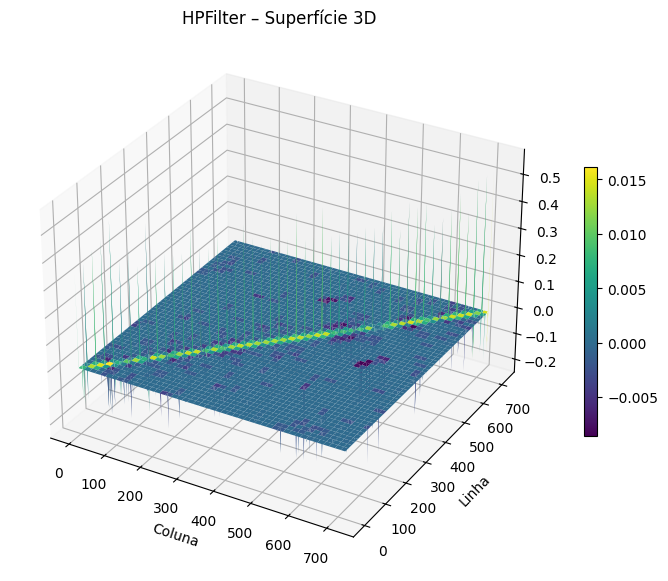

0.011191574260811727 - 1.432002835786499e-05 - 8000
0.011191574258615616 - 1.4320029329877489e-05 - 8001
0.011191574256419548 - 1.4320030301834459e-05 - 8002
0.011191574254223527 - 1.4320031273860555e-05 - 8003
0.011191574252027428 - 1.4320032245922739e-05 - 8004
0.011191574249831453 - 1.4320033217916346e-05 - 8005
0.011191574247635434 - 1.4320034189875532e-05 - 8006
0.011191574245439392 - 1.4320035161987022e-05 - 8007
0.01119157424324337 - 1.4320036133977841e-05 - 8008
0.011191574241047351 - 1.432003710604838e-05 - 8009
0.011191574238851221 - 1.4320038078174423e-05 - 8010
0.011191574236655245 - 1.4320039050082358e-05 - 8011
0.011191574234459288 - 1.4320040022196013e-05 - 8012
0.011191574232263225 - 1.432004099430498e-05 - 8013
0.011191574230067246 - 1.4320041966389424e-05 - 8014
0.011191574227871245 - 1.4320042938469022e-05 - 8015
0.011191574225675353 - 1.4320043910578488e-05 - 8016
0.011191574223479425 - 1.4320044882559763e-05 - 8017
0.01119157422128333 - 1.4320045854782265e-05 - 801

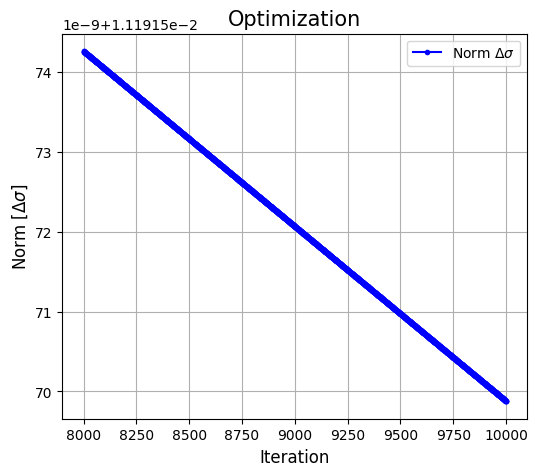

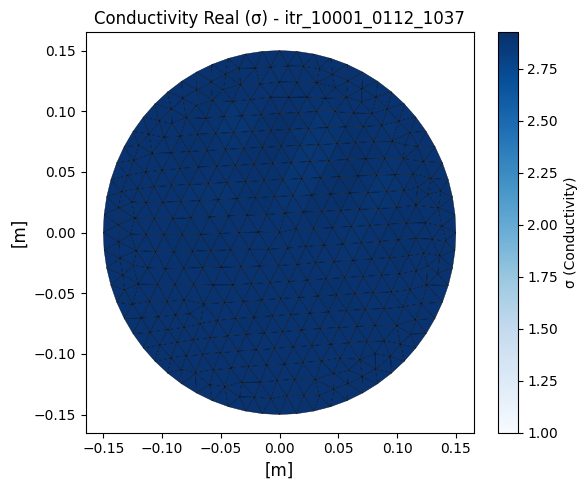

In [3]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt


nome = '../../malhasMSH/circ16_base_plus.msh'

MinhaMalhaBase16 = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaBase16.ReadMesh() 

meus_sigmas = {1000 : 1.0}

MinhaMalhaBase16.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaBase16.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaBase16.KGlobal.shape}')

fwd = forwardProblem.forward_problem(MinhaMalhaBase16, Pcorrente=None, SkipPattern=2, I =1.0e-3)   # __init__ roda aqui




#print(MinhaMalhaBase16.Elements[2])
#print(f"Centroid: {MinhaMalhaBase16.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaBase16.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial
#Pcorrente = np.loadtxt("padrao128CC_257b.txt")
iteration= np.loadtxt("lastIteration.txt")
#iteration =0
print(f'lastIteration {iteration}')


sigma_inicial_cont = np.loadtxt("sigma_inicial_cont.txt")
invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=fwd.corrente)

#invProblem_2D.solve(V_measured,initialEstimate=2.9, alpha =0.010,  Lambda = 0.5, max_iter=2, Tol=1.0e-20, iteration=iteration)
invProblem_2D.solve(V_measured,initialEstimate=sigma_inicial_cont, alpha =0.0010,  Lambda = 1.0e-3, max_iter=10002, Tol=1.0e-20, iteration=iteration)
#print('Y_jacobian',invProblem.Y_jacobian)
